#### Import libs

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#### Load Files

In [2]:
imoveis = pd.read_csv(r'Dados\Valorizacao_Ambiental.csv', sep=';')
display(imoveis.head(3))

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1


#### EDA

In [3]:
imoveis.shape

(172, 10)

In [4]:
imoveis.isnull().sum().sum()

0

In [5]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Identificando a variável target

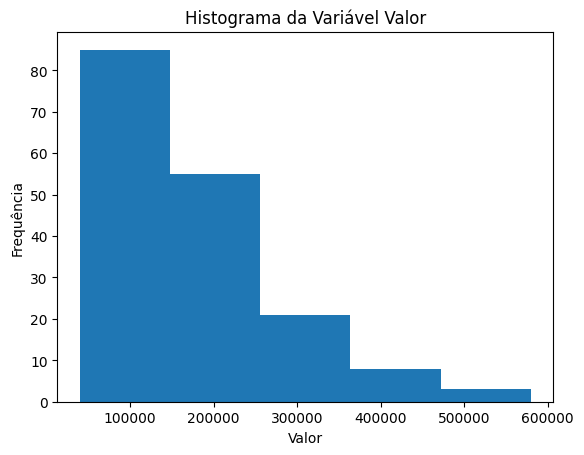

In [6]:
plt.hist(imoveis['Valor'], bins=5)
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma da Variável Valor')
plt.show()

In [7]:
imoveis['raiz_valor'] = np.sqrt(imoveis['Valor'])
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


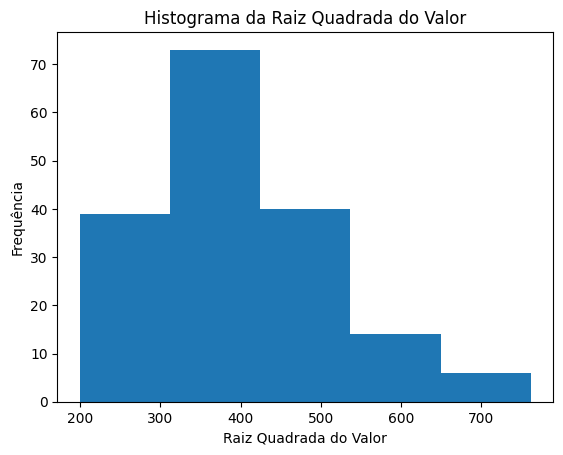

In [8]:
plt.hist(imoveis['raiz_valor'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Raiz Quadrada do Valor')
plt.title('Histograma da Raiz Quadrada do Valor')
plt.show()

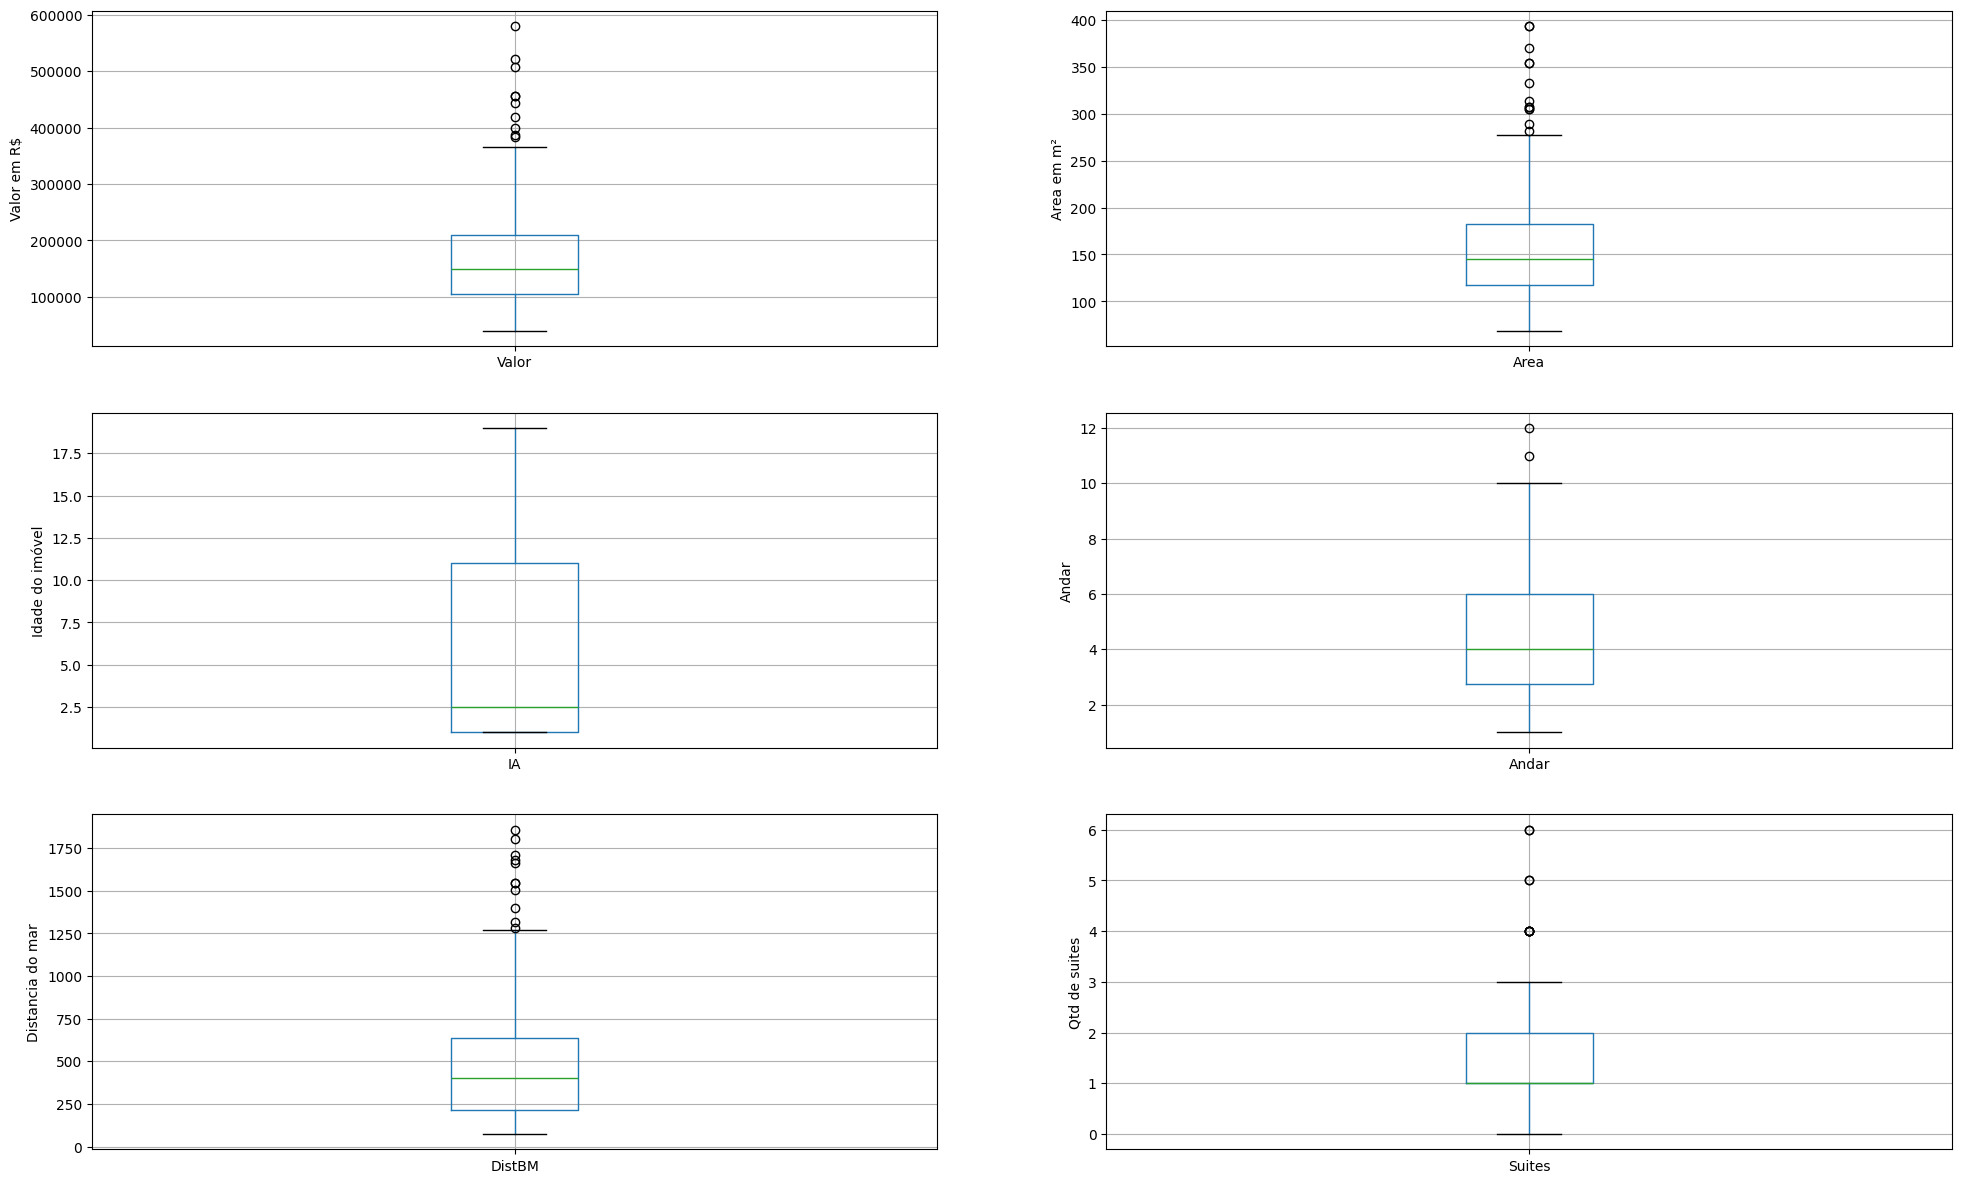

In [9]:
plt.figure(figsize=(24, 20))

plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column='Valor')
fig.set_title('')
fig.set_ylabel('Valor em R$')

plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column='Area')
fig.set_title('')
fig.set_ylabel('Area em m²')

plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column='IA')
fig.set_title('')
fig.set_ylabel('Idade do imóvel')

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column='Andar')
fig.set_title('')
fig.set_ylabel('Andar')

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column='DistBM')
fig.set_title('')
fig.set_ylabel('Distancia do mar')

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column='Suites')
fig.set_title('')
fig.set_ylabel('Qtd de suites')

plt.show()

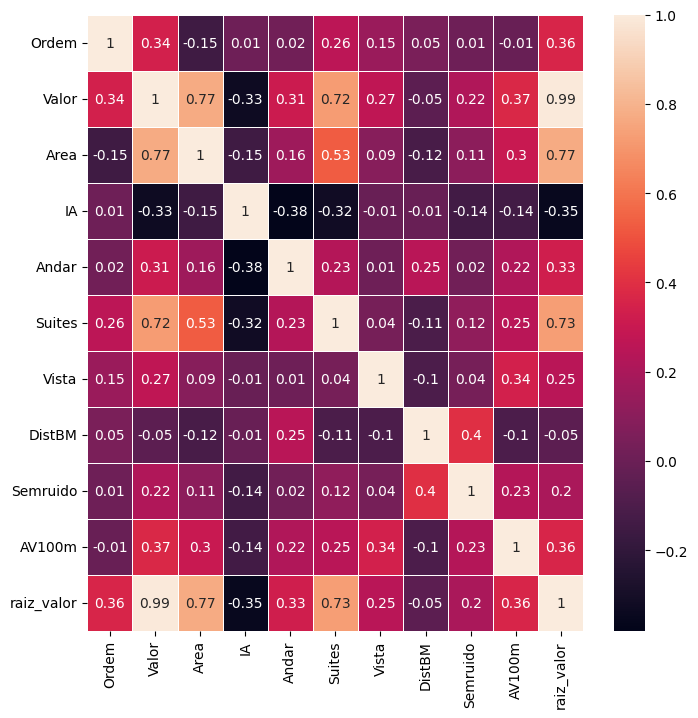

In [10]:
df_numeric = imoveis.select_dtypes(include=[np.number])
matriz_correlacao = df_numeric.corr().round(2)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(matriz_correlacao, annot=True, linewidths=.5, ax=ax)
plt.show()

Avaliando as variáveis com maior coeficiente de correlação

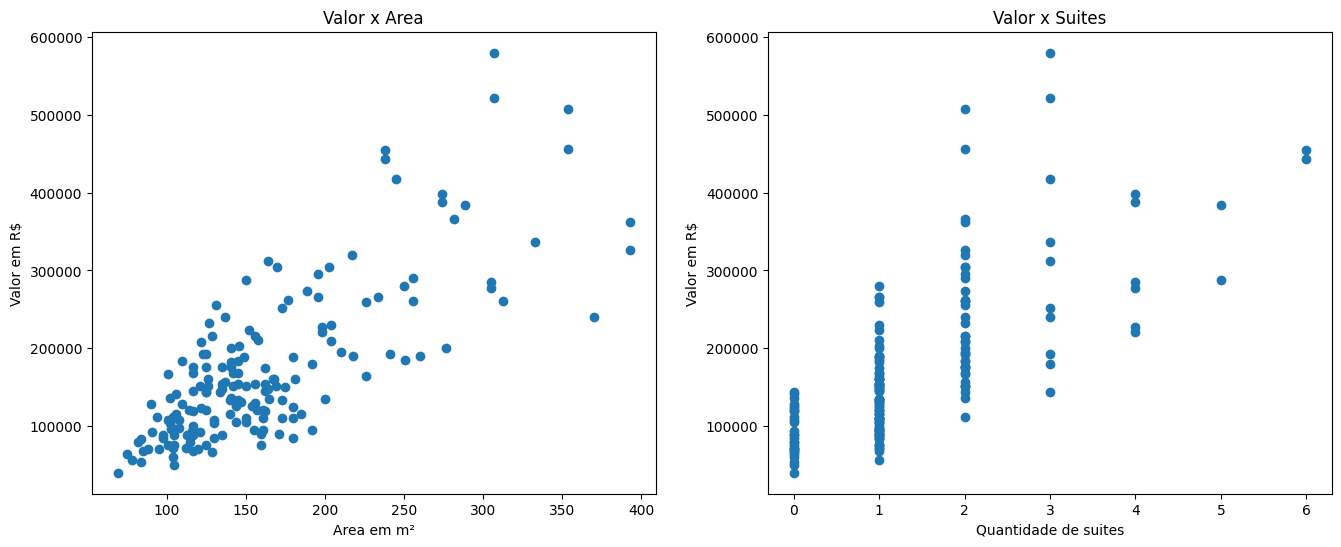

In [11]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter('Area', 'Valor', data=imoveis)
plt.ylabel('Valor em R$')
plt.xlabel('Area em m²')
plt.title('Valor x Area')

plt.subplot(1, 2, 2)
plt.scatter('Suites', 'Valor', data=imoveis)
plt.ylabel('Valor em R$')
plt.xlabel('Quantidade de suites')
plt.title('Valor x Suites')

plt.show()

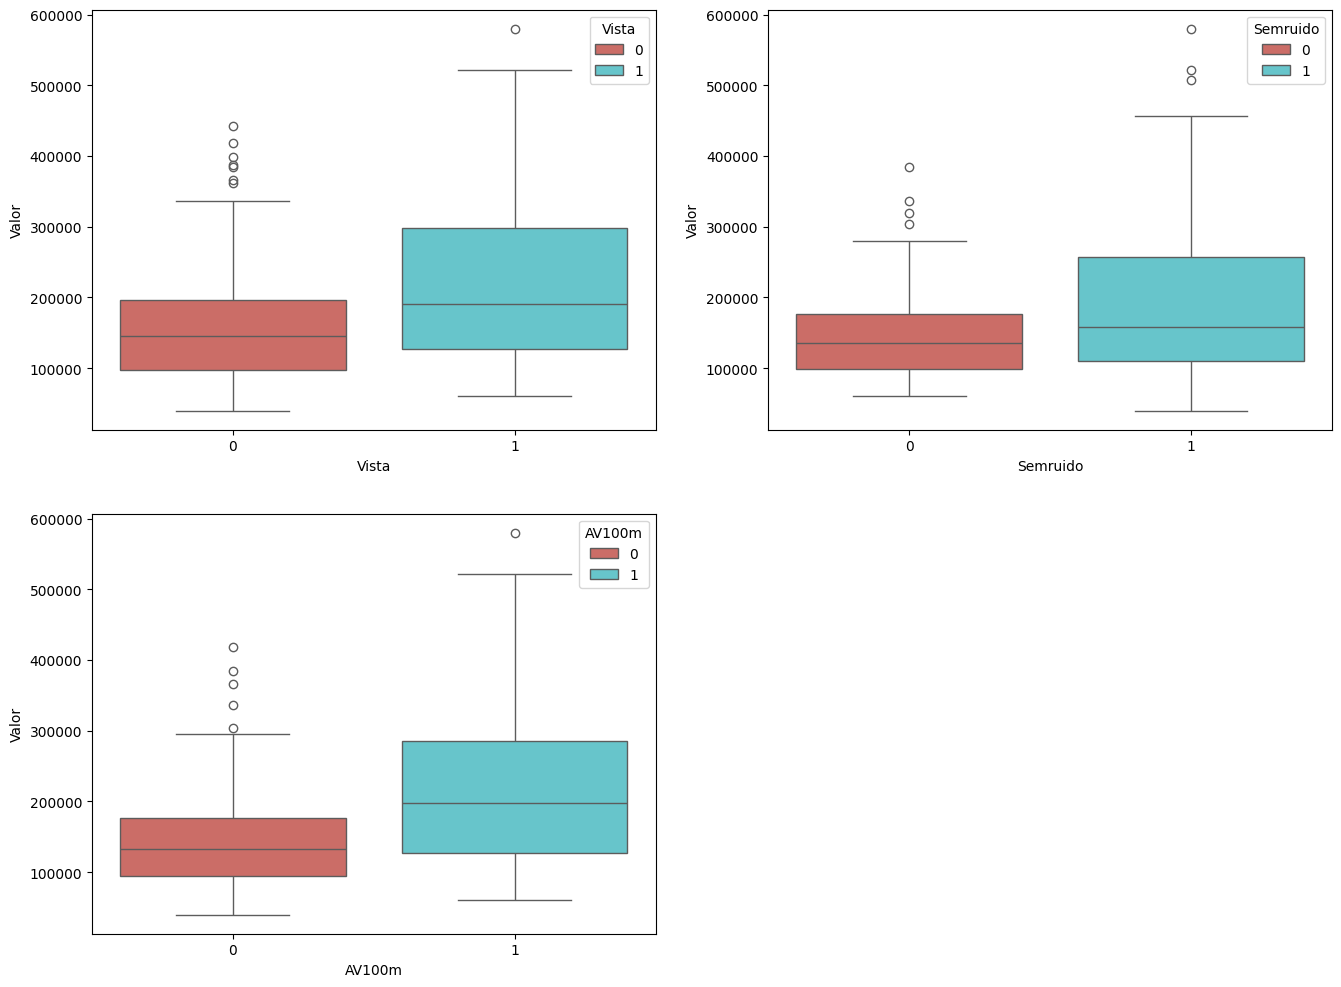

In [12]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='Vista', y='Valor', data=imoveis, palette='hls', hue='Vista')

plt.subplot(2, 2, 2)
sns.boxplot(x='Semruido', y='Valor', data=imoveis, palette='hls', hue='Semruido')

plt.subplot(2, 2, 3)
sns.boxplot(x='AV100m', y='Valor', data=imoveis, palette='hls', hue='AV100m')

plt.show()

#### Building ML Model

##### Avaliando com Linear Regression

In [14]:
lr = LinearRegression()

Instanciando meus dados em variaveis independentes e dependentes

In [17]:
x = imoveis[['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBM']]

y = imoveis['Valor']

Separando bases de treino e teste

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

Treinando o modelo

In [20]:
lr.fit(x_train, y_train)

LinearRegression()

Calculando o valor predito da variável resposta na amostra teste

In [21]:
y_pred = lr.predict(x_test)

In [22]:
# avalinado o intercepto e os coeficientes
# representa o valor esperado da variável dependente quando todas as variáveis independentes são iguais a zero
# Em termos gráficos, o intercepto é o ponto onde a linha de regressão atinge o eixo y

print('Intercepto: ', lr.intercept_)

Intercepto:  -40165.875277302024


In [32]:
# Os coeficientes da regressão linear representam as inclinações da linha de regressão para cada variável independente

coefficients = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coefficients

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


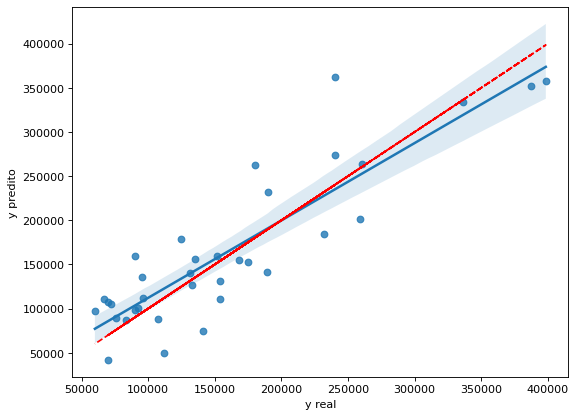

In [35]:
fig = plt.figure(figsize=(8 ,6), dpi=80)
plt.rcParams.update({'font.size': 10})
ax = sns.regplot(x = y_test, y= y_pred)
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')

plt.show()

Avaliando o modelo

In [40]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: ', MAE) # Erro médio absoluto
print('MSE: ', MSE) # Erro médio quadrático
print('R2: ', r2) # R2

MAE:  34422.98857094568
MSE:  1844288772.1790047
R2:  0.758459196912501


##### Avaliando com DecisionTreeRegressor

Observamos que nosso modelo de regressão linear se comportou bem, mas e se tentarmos criar um novo modelo sob um outro tipo de algoritmo diferente?

Um modelo de DecisionTreeRegressor é um modelo de árvore de decisão utilizado para resolver problemas de regressão. Esse tipo de técnica cria uma estrutura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e a variável alvo.

In [46]:
# criando o modelo DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [47]:
y_pred_model_dtr = model_dtr.predict(x_test)

Avaliando o modelo

In [48]:
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)

print('MAE: ', MAE) # Erro médio absoluto
print('MSE: ', MSE) # Erro médio quadrático
print('R2: ', r2) # R2

MAE:  44913.75102040816
MSE:  3223969337.3848395
R2:  0.577766695417574


##### Avaliando com SVR

Agora vamos testar um outro tipo de algoritmo para analisar a performance, o Support Vector Regression. O SVR, é usado para tarefas de regressão, em que a tarefa é prever um valor contínuo em vez de uma classe.

In [50]:
# criando o modelo SVR
svr = SVR(kernel='linear')

In [51]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [52]:
y_pred_svr = svr.predict(x_test)

In [53]:
MAE = mean_absolute_error(y_test, y_pred_svr)
mean_squared_error = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print('MAE: ', MAE) # Erro médio absoluto
print('MSE: ', MSE) # Erro médio quadrático
print('R2: ', r2) # R2

MAE:  43153.53918496288
MSE:  3223969337.3848395
R2:  0.5909350700044546


#### Conclusão

O melhor modelo avaliado foi LinearRegression